In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file from the given link
data_url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(data_url)

# Print the column names
print("Available column names:")
print(df.columns)


Available column names:
Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')


In [ ]:
# Get all the cars and their types that do not qualify for clean alternative fuel vehicle
not_clean_cars = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'No']
not_clean_cars_info = not_clean_cars[['Make', 'Model']]
print("Cars and their types that do not qualify for clean alternative fuel vehicle:")
print(not_clean_cars_info)


Cars and their types that do not qualify for clean alternative fuel vehicle:
Empty DataFrame
Columns: [Make, Model]
Index: []


In [ ]:
# Get all TESLA cars with the model year and model type made in Bothell City
tesla_cars = df[(df['Make'] == 'TESLA') & (df['City'] == 'BOTHELL')]
tesla_cars_info = tesla_cars[['Model Year', 'Model']]
print("TESLA cars with the model year and model type made in Bothell City:")
print(tesla_cars_info)

TESLA cars with the model year and model type made in Bothell City:
Empty DataFrame
Columns: [Model Year, Model]
Index: []


In [ ]:
# Get all the cars that have an electric range of more than 100 and were made after 2015
electric_cars = df[(df['Electric Range'] > 100) & (df['Model Year'] > 2015)]
electric_cars_info = electric_cars[['Make', 'Model', 'Electric Range', 'Model Year']]
print("Cars with an electric range of more than 100 and made after 2015:")
print(electric_cars_info)

Cars with an electric range of more than 100 and made after 2015:
          Make    Model  Electric Range  Model Year
0        TESLA  MODEL X             238        2018
2        TESLA  MODEL 3             220        2019
4        TESLA  MODEL S             210        2017
12       TESLA  MODEL 3             308        2020
13       TESLA  MODEL 3             322        2020
...        ...      ...             ...         ...
130417   TESLA  MODEL Y             291        2020
130428  NISSAN     LEAF             151        2018
130432   TESLA  MODEL Y             291        2020
130436   TESLA  MODEL 3             215        2018
130441   TESLA  MODEL X             293        2020

[34066 rows x 4 columns]


<Figure size 1200x600 with 0 Axes>

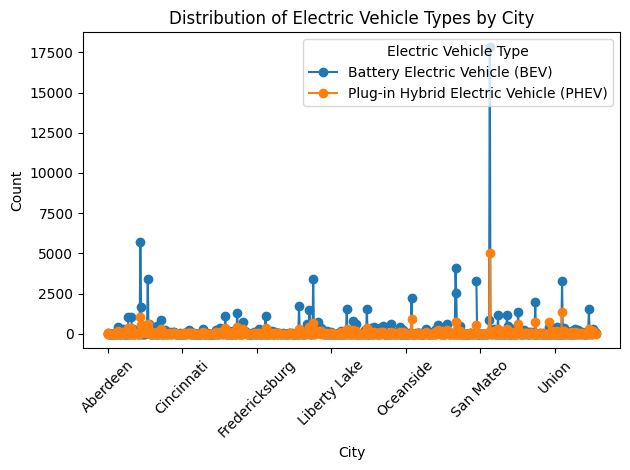

In [ ]:
# Draw plots to show the distribution between city and electric vehicle type

plt.figure(figsize=(12, 6))
city_electric_count = df.groupby(['City', 'Electric Vehicle Type']).size().unstack()
city_electric_count.plot(kind='line', marker='o')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of Electric Vehicle Types by City')
plt.legend(title='Electric Vehicle Type', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()